## Movies Recommendation System using Collaborative Filtering
* By using the similarity between different users (users may give similar ratings to the same items) and the similarity between items (similar movies may be given similar ratings by the users),we will recommend new movies to the users.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('ml-latest-small/ratings.csv')
df_id = pd.read_csv('ml-latest-small/links.csv')
df = pd.merge(df,df_id,on=['movieId'])

In [3]:
df

,userId,movieId,rating,timestamp,imdbId,tmdbId
0,1,1,4.0,964982703,114709,862.0
1,5,1,4.0,847434962,114709,862.0
2,7,1,4.5,1106635946,114709,862.0
3,15,1,2.5,1510577970,114709,862.0
4,17,1,4.5,1305696483,114709,862.0
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,118745,30948.0
100832,610,160527,4.5,1479544998,66806,90351.0
100833,610,160836,3.0,1493844794,798722,70193.0
100834,610,163937,3.5,1493848789,1540011,351211.0


In [4]:
df.userId.shape

(100836,)

In [5]:
df.userId.unique().shape

(610,)

In [6]:
rating_matrix = np.zeros((df.userId.unique().shape[0],max(df.movieId)))
for row in df.itertuples():
    rating_matrix[row[1]-1,row[2]-1]=row[3]
rating_matrix = rating_matrix[:,:9000]

In [7]:
rating_matrix.shape

(610, 9000)

In [8]:
sparsity = float(len(rating_matrix.nonzero()[0]))
sparsity /= (rating_matrix.shape[0] * rating_matrix.shape[1])
sparsity *= 100

In [9]:
sparsity

1.4194353369763206

In [10]:
train_matrix = rating_matrix.copy()
test_matrix = np.zeros(rating_matrix.shape)

for i in range(rating_matrix.shape[0]):
    rating_idx = np.random.choice(
        rating_matrix[i,:].nonzero()[0],
        size = 10,
        replace = True
    )
train_matrix[i,rating_idx] = 0.0
test_matrix[i,rating_idx] = rating_matrix[i,rating_idx] 

In [11]:
similarity_user = train_matrix.dot(train_matrix.T) + 1e-9
norms = np.array([np.sqrt(np.diagonal(similarity_user))])
similarity_user = similarity_user/(norms*norms.T)

similarity_movie = train_matrix.T.dot(train_matrix) + 1e-9
norms = np.array([np.sqrt(np.diagonal(similarity_movie))])
similarity_movie = similarity_movie/(norms*norms.T)

In [12]:
from sklearn.metrics import mean_squared_error

prediction = similarity_user.dot(train_matrix)/np.array([np.abs(similarity_user).sum(axis=1)]).T
prediction = prediction[test_matrix.nonzero()].flatten()
test_vector = test_matrix[test_matrix.nonzero()].flatten()
mse = mean_squared_error(prediction,test_vector)
rmse = np.sqrt(mse)
print('MSE:{}\nRMSE:{}'.format(mse,rmse))

MSE:7.452149940600366
RMSE:2.729862623027094


In [13]:
df_id

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [14]:
import requests 
import json

from IPython.display import Image
from IPython.display import display
from IPython.display import HTML

idx_to_movie = {}
for row in df_id.itertuples():
    idx_to_movie[row[1]-1] = row[3] # row[1] contains movie_id and row[3] contains tmdb_id
idx_to_movie

{0: 862.0,
 1: 8844.0,
 2: 15602.0,
 3: 31357.0,
 4: 11862.0,
 5: 949.0,
 6: 11860.0,
 7: 45325.0,
 8: 9091.0,
 9: 710.0,
 10: 9087.0,
 11: 12110.0,
 12: 21032.0,
 13: 10858.0,
 14: 1408.0,
 15: 524.0,
 16: 4584.0,
 17: 5.0,
 18: 9273.0,
 19: 11517.0,
 20: 8012.0,
 21: 1710.0,
 22: 9691.0,
 23: 12665.0,
 24: 451.0,
 25: 16420.0,
 26: 9263.0,
 27: 17015.0,
 28: 902.0,
 29: 37557.0,
 30: 9909.0,
 31: 63.0,
 33: 9598.0,
 35: 687.0,
 37: 33689.0,
 38: 9603.0,
 39: 34615.0,
 40: 31174.0,
 41: 11443.0,
 42: 35196.0,
 43: 9312.0,
 44: 577.0,
 45: 11861.0,
 46: 807.0,
 47: 10530.0,
 48: 8391.0,
 49: 629.0,
 51: 11448.0,
 52: 49133.0,
 53: 26441.0,
 54: 97406.0,
 56: 9089.0,
 57: 11010.0,
 59: 11359.0,
 60: 17182.0,
 61: 2054.0,
 62: 10607.0,
 63: 19760.0,
 64: 9536.0,
 65: 11525.0,
 67: 4482.0,
 68: 10634.0,
 69: 755.0,
 70: 11859.0,
 71: 28387.0,
 72: 48750.0,
 73: 20927.0,
 74: 36929.0,
 75: 9102.0,
 76: 124626.0,
 77: 27526.0,
 78: 9623.0,
 79: 46785.0,
 80: 400.0,
 81: 880.0,
 82: 146599.0

## Recommending Movies on basis of User Similarity

* We will find a most similar user to our given user using the similarity_user matrix and then we will find the top rated movies of that similar user from the rating_matrix. Then, we will recommend k movies from those top rated movies to our given user.

In [15]:
 k = 6 # k represents the number of movies that will be recommended to the given user

* In the definition of show_recommendations below, I have not show the API-Key. You to issue a API-Key of your own from the The Movie Database website. Visit here https://www.themoviedb.org/documentation/api?language=en-US to generate your own API-Key.

In [16]:
def show_recommendations(movies_tmdb_id):
    print("Recommended Movies :")
    n = len(movies_tmdb_id)
    responses=[]
    for i in range(0,n):
        responses.append(requests.get("https://api.themoviedb.org/3/movie/{}?api_key=xxxxxxxxxxxx".format(movies_tmdb_id[i])))

    data = {}
    poster_paths = {}
    for i in range(0,n):
        data[i] = responses[i].json()
        poster_paths[i] = data[i]['poster_path']

    image_responses = {}
    for i in range(0,n):
        image_responses[i] = requests.get("https://image.tmdb.org/t/p/w500"+poster_paths[i])

    import matplotlib.pyplot as plt
    import cv2 as cv
    for i in range(0,n):    
        if image_responses[i].status_code == 200:
            with open("sample{}.jpg".format(str(i)), 'wb') as f:
                f.write(image_responses[i].content)
    width = 200
    height = 200
    img1 = cv.imread('sample0.jpg')
    img1 = cv.resize(img1,(width,height))
    img_concate_Hori = img1
    for i in range(1,n):   
        img = cv.imread('sample{}.jpg'.format(str(i)))
        img = cv.resize(img,(width,height))
        img_concate_Hori=np.concatenate((img_concate_Hori,img),axis=1)
    cv.imshow('Images',img_concate_Hori)
    cv.waitKey(0)
    cv.destroyAllWindows()      
    w=10
    h=10
    fig=plt.figure(figsize=(w, h))
    columns = 3
    rows = 2
    for i in range(1, columns*rows + 1):
        fig.add_subplot(rows, columns, i)
        img = plt.imread('sample{}.jpg'.format(str(i-1)))
        plt.axis('off')
        plt.imshow(img)
    plt.show()

Enter a user for which you want to recommend movies (1-610) :3

user-3 is most similar to user-377
Recommended Movies :


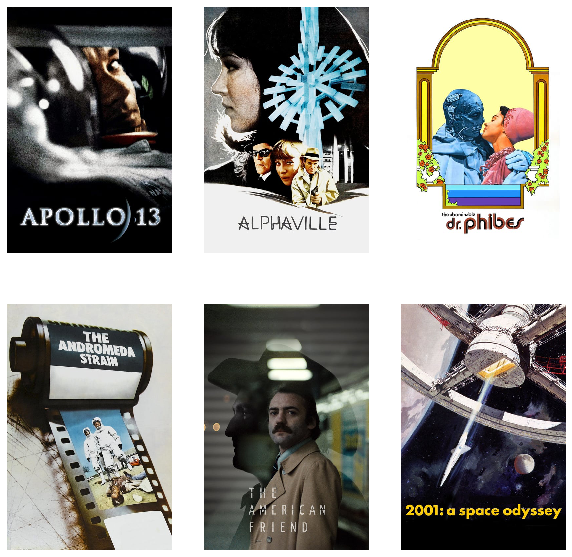

In [19]:
user = int(input("Enter a user for which you want to recommend movies (1-{}) :".format(rating_matrix.shape[0])))
result  = [ x for x in np.argsort(similarity_user[user-1,:])[:-3:-1]] # finding most similar user of given user using the similarity_user matrix
similar_user = result[1] # We store index of most similar user at result[1] and not at result[0] because result[0] gives the index of user for which we are trying to find most similar user
print('\nuser-{} is most similar to user-{}'.format(user,similar_user+1))
result  = [ x for x in np.argsort(rating_matrix[similar_user,:])[:-k-1:-1]] # selecting index of top rated six movies of most similar user
movies_tmdb_id  = [idx_to_movie[x] for x in result]
movies_tmdb_id
show_recommendations(movies_tmdb_id)

## Recommending Movies on basis of Movie Similarity

* We will find the most top rated movies of the given user. Then, we will find the movies similar to these top rated movies using the similarity_movie matrix and recommend those movies to the given user

Enter a user (1-610) :3
Indices of top rated movies of user-3 : [ 5 21 24 26 28 29 31 33 35] 
Enter a index to recommend movies to user-3 from the indices (1-9): 1
Recommended Movies :


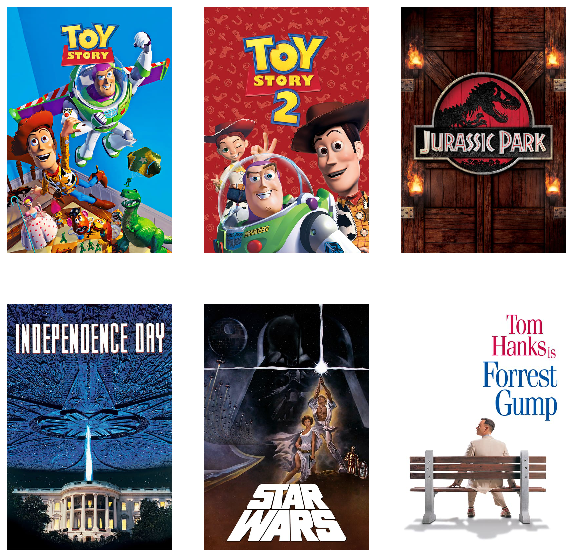

In [20]:
user = int(input("Enter a user (1-{}) :".format(rating_matrix.shape[0])))
indices = rating_matrix[user-1].nonzero()

user_rating_toMovie = []
for x in indices:
    user_rating_toMovie.append(rating_matrix[user-1,x])
    
result = np.where(user_rating_toMovie == np.amax(user_rating_toMovie))
print('Indices of top rated movies of user-{} : {} '.format(user,result[1]))
idx_to_highRatedMovies = [ indices[0][x] for x in result[1]]

idx = int(input("Enter a index to recommend movies to user-{} from the indices (1-{}): ".format(user,len(idx_to_highRatedMovies))))
idx = idx -1
movies_tmdb_id  = [idx_to_movie[x] for x in np.argsort(similarity_movie[idx,:])[:-k-1:-1]]

show_recommendations(movies_tmdb_id)